In [1]:
import gpxpy
import gpxpy.gpx
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from folium.vector_layers import Rectangle
from shapely.geometry import LineString
from shapely.ops import unary_union

In [2]:
import numpy as np
import gpxpy

gpx_file = open('/Users/ashwin/Desktop/wards and gps/fefa3de2-c689-4017-a629-baf7e68f5d69_493.gpx', 'r')
gpx = gpxpy.parse(gpx_file)
qt = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            qt.append((point.latitude, point.longitude))

observations_array = np.array(qt)
qt4 = observations_array[198:262]

In [3]:
import folium
from gpxpy import parse

gpx_file = open('/Users/ashwin/Desktop/wards and gps/fefa3de2-c689-4017-a629-baf7e68f5d69_493.gpx', 'r')
gpx = parse(gpx_file)

map_center4 = [gpx.tracks[0].segments[0].points[0].latitude, gpx.tracks[0].segments[0].points[0].longitude]
mymap4 = folium.Map(location=map_center4, zoom_start=12)

for track in gpx.tracks:
    for segment in track.segments:
        lat_lon_pairs4 = [(point.latitude, point.longitude) for point in segment.points[198:262]]  
        folium.PolyLine(lat_lon_pairs4, color="blue", weight=2.5, opacity=1).add_to(mymap4)

mymap4


In [4]:
import folium
from shapely.geometry import LineString
import gpxpy

gpx_file = open('/Users/ashwin/Desktop/wards and gps/fefa3de2-c689-4017-a629-baf7e68f5d69_493.gpx', 'r')
gpx = gpxpy.parse(gpx_file)

all_points4 = []
for track in gpx.tracks:
    for segment in track.segments:
        all_points4.extend([(point.longitude, point.latitude) for point in segment.points[198:262]]) 

route_line4 = LineString(all_points4)
buffer_distance4 = 0.001  
route_buffer4 = route_line4.buffer(buffer_distance4)
map_center4 = route_line4.centroid.coords[0][::-1] 
mymap4 = folium.Map(location=map_center4, zoom_start=14)
lat_lon_pairs4 = [(point[1], point[0]) for point in route_line4.coords]
folium.PolyLine(lat_lon_pairs4, color="blue", weight=2.5, opacity=1).add_to(mymap4)
route_buffer_geojson4 = route_buffer4.__geo_interface__
folium.GeoJson(route_buffer_geojson4, name='geofence').add_to(mymap4)
mymap4


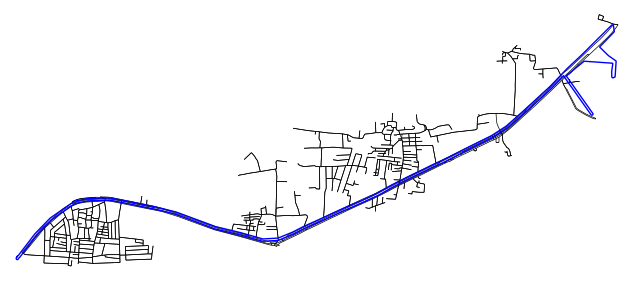

In [5]:
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
route_polygon4 = route_buffer4.convex_hull
G4 = ox.graph_from_polygon(route_polygon4, network_type='drive')
fig4, ax4 = ox.plot_graph(G4, bgcolor='w', edge_color='k', edge_linewidth=0.5, node_size=0, show=False, close=False)
route_line_buffer = route_line4.buffer(0.0001)  
ax4.plot(*route_line_buffer.exterior.xy, color='blue', linewidth=1)
ax4.plot(*route_line_buffer.exterior.xy[198:262], color='blue', linewidth=1)
plt.show()


In [6]:
import osmnx as ox
import numpy as np
from shapely.geometry import LineString
route_polygon4 = route_buffer4.convex_hull
G4 = ox.graph_from_polygon(route_polygon4, network_type='drive')
states4 = np.array([(data4['y'], data4['x']) for node, data4 in G4.nodes(data=True)])
print("Number of nodes:", len(states4))
print("Node coordinates:")
for node in states4:
    print(node)

Number of nodes: 533
Node coordinates:
[12.9209256 77.6655498]
[12.9230168 77.6653306]
[12.9231317 77.664071 ]
[12.923117  77.6630484]
[12.9230102 77.6623099]
[12.9226787 77.6515237]
[12.919575  77.6454813]
[12.9237805 77.6659947]
[12.9221699 77.6630406]
[12.918953  77.6492598]
[12.9194764 77.649235 ]
[12.9239957 77.649786 ]
[12.9225543 77.6497307]
[12.9219107 77.6496931]
[12.9207019 77.6493922]
[12.9194627 77.6471863]
[12.9187741 77.6470906]
[12.9190163 77.6511675]
[12.9196705 77.6521539]
[12.91908   77.6479903]
[12.9190278 77.6516519]
[12.930536  77.6758978]
[12.9303496 77.6761242]
[12.9300138 77.6762316]
[12.9296986 77.6764008]
[12.929517  77.6764153]
[12.9280487 77.6765419]
[12.9300291 77.6764347]
[12.930452  77.6785911]
[12.927028  77.6652842]
[12.9229309 77.6468724]
[12.9210077 77.6474063]
[12.9199334 77.6472629]
[12.922423  77.6505891]
[12.9224442 77.650475 ]
[12.9210743 77.6506474]
[12.9210288 77.6515866]
[12.9210477 77.6512497]
[12.921058  77.6509332]
[12.9224777 77.6508982]
[

In [7]:
import numpy as np
from math import exp, sqrt, pi

pairwise_distances4 = []
for i in range(len(qt4) - 1):
    x1, y1 = qt4[i]
    x2, y2 = qt4[i + 1]
    distance = sqrt((x2 - x1)**2 + (y2 - y1)**2)
    pairwise_distances4.append(distance)
TRANS4 = np.zeros((len(states4), len(states4), len(qt4)-1))

beta = 0.95  

n4 = len(states4)
for k in range(len(qt4)-1):
    for i in range(n4):
        for j in range(n4):
            xtemp4 = np.linalg.norm(states4[i] - states4[j])
            dij4 = abs(xtemp4 - pairwise_distances4[k])
            TRANS4[i, j, k] = (1 / beta) * exp(-dij4 / beta)
        TRANS4[i, :, k] = TRANS4[i, :, k] / np.sum(TRANS4[i, :, k])

sigztemp4 = []
for i in range(len(qt4)):
    for j in range(len(states4)):
        sigztemp4.append(np.linalg.norm(qt4[i] - states4[j]))
sigz4 = 1.4 * np.median(sigztemp4)

EMIS4 = np.zeros((len(states4), len(qt4)))
for i in range(len(qt4)):
    for j in range(len(states4)):
        EMIS4[j, i] = (1 / (sqrt(2 * pi) * sigz4)) * exp(-0.5 * ((np.linalg.norm(qt4[i] - states4[j])) / sigz4) ** 2)

# seq = [1, 2, 3, 4]
seq4 = np.arange(1, len(qt4)+1)

PRIOR4 = np.array([(1 / len(states4))] * len(states4))
# PRIOR[358] = 0.7

T4 = len(seq4)  # Number of observations
n4 = EMIS4.shape[0]  # Number of states

score4 = np.zeros((n4, T4))
pred4 = np.zeros((n4, T4))

for i in range(n4):
    score4[i, 0] = PRIOR4[i] * EMIS4[i, seq4[0] - 1]

for t in range(1, T4):
    for j in range(n4):
        tscore4 = np.zeros(n4)
        for k in range(n4):
            tscore4[k] = score4[k, t - 1] * TRANS4[k, j, t - 1] * EMIS4[j, seq4[t] - 1]
        score4[j, t] = np.max(tscore4)
        id4 = np.where(tscore4 == np.max(tscore4))[0][0]
        pred4[j, t] = id4

IT4 = np.zeros(T4, dtype=int)
IT4[-1] = np.argmax(score4[:, -1])

for t in range(T4 - 1, 0, -1):
    IT4[t - 1] = int(pred4[IT4[t], t])

print(IT4)

[ 75  77  77  77  77  77  77  77  77  77  77 311 317 121 128 126 104 368
 454 354  90 124 304 106 100 495 532 141 363 433  83 227 506 324 284 127
 442 498 248 111  89 362 361  96 511 509 117 437 356 117 437 509 509 509
 509 509 509 510 507 507 507 365 365 365]


In [8]:
coordinates_IT4 = states4[IT4]
print(coordinates_IT4)

[[12.9198251 77.6431146]
 [12.9198785 77.6430337]
 [12.9198785 77.6430337]
 [12.9198785 77.6430337]
 [12.9198785 77.6430337]
 [12.9198785 77.6430337]
 [12.9198785 77.6430337]
 [12.9198785 77.6430337]
 [12.9198785 77.6430337]
 [12.9198785 77.6430337]
 [12.9198785 77.6430337]
 [12.9209373 77.6450387]
 [12.922413  77.645531 ]
 [12.9242339 77.6474492]
 [12.9235393 77.6480847]
 [12.9246483 77.6499056]
 [12.9242952 77.6517878]
 [12.9239818 77.653993 ]
 [12.9236546 77.6550142]
 [12.9217362 77.661466 ]
 [12.921278  77.6629056]
 [12.9207952 77.6648521]
 [12.920404  77.6654391]
 [12.9212315 77.6662638]
 [12.9218538 77.6679317]
 [12.9228682 77.6695001]
 [12.9235485 77.6717574]
 [12.9237277 77.673219 ]
 [12.9245434 77.6737618]
 [12.9244952 77.6750332]
 [12.9256058 77.6761182]
 [12.9262199 77.6774128]
 [12.9262173 77.6780437]
 [12.926801  77.6778292]
 [12.927551  77.6794085]
 [12.9276205 77.679761 ]
 [12.9281876 77.6807613]
 [12.9279013 77.6810025]
 [12.9288063 77.6829168]
 [12.9302866 77.6850508]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


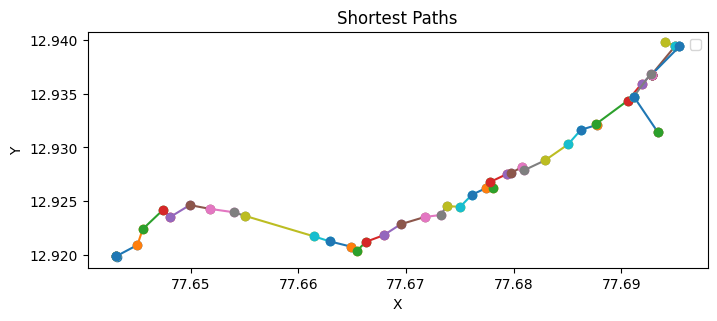

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def display_shortest_paths(paths, states):
    fig, ax = plt.subplots(figsize=(8, 8))  # Adjust figure size for better visualization
    for i, path in enumerate(paths):
        path_coordinates = [states[i] for i in path]
        x, y = zip(*path_coordinates)
        ax.plot(y, x, marker='o')  # Plot each path separately with a label
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Shortest Paths')
    ax.legend()  # Show legend to differentiate between paths
    plt.show()

G4 = nx.Graph()
for i in range(len(IT4) - 1):
    G4.add_edge(IT4[i], IT4[i + 1])
shortest_paths = [nx.shortest_path(G4, IT4[i], IT4[i + 1]) for i in range(len(IT4) - 1)]

# Display the shortest paths
display_shortest_paths(shortest_paths, states4)


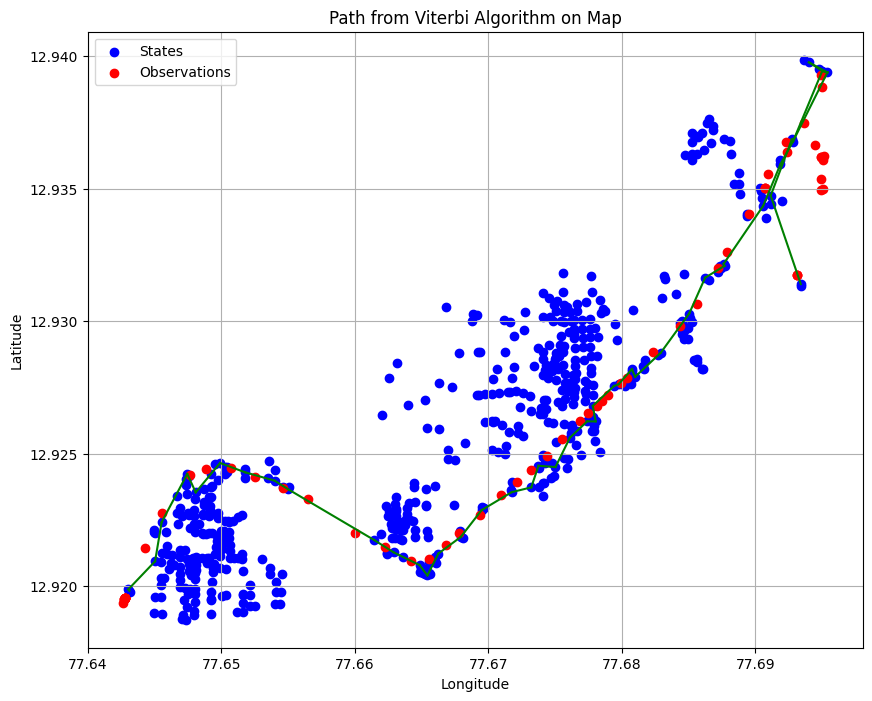

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(states4[:, 1], states4[:, 0], color='blue', label='States')
plt.scatter(qt4[:, 1], qt4[:, 0], color='red', label='Observations')
for i in range(len(IT4) - 1 - 0):
    start_point = states4[IT4[i]]
    end_point = states4[IT4[i + 1]]
    plt.plot([start_point[1], end_point[1]], [start_point[0], end_point[0]], color='green')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Path from Viterbi Algorithm on Map')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


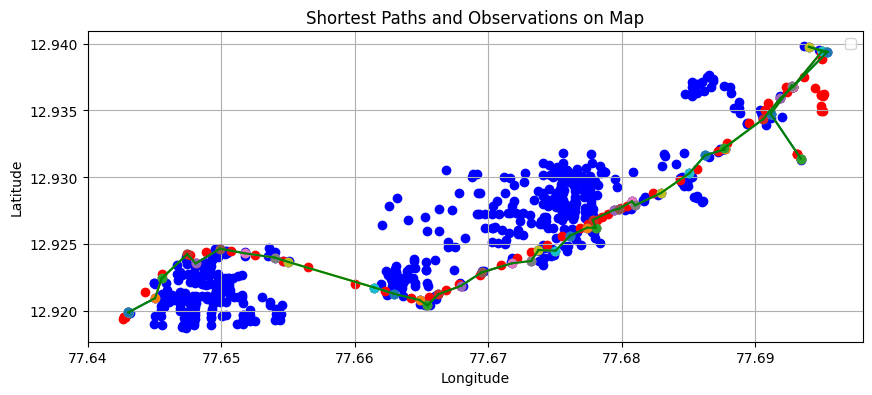

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

def display_shortest_paths(paths, states):
    fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figure size for better visualization
    for i, path in enumerate(paths):
        path_coordinates = [states[i] for i in path]
        x, y = zip(*path_coordinates)
        ax.plot(y, x, marker='o')  # Plot each path separately with a label

    plt.scatter(states[:, 1], states[:, 0], color='blue')
    plt.scatter(qt4[:, 1], qt4[:, 0], color='red')
    for i in range(len(IT4) - 1):
        start_point = states[IT4[i]]
        end_point = states[IT4[i + 1]]
        ax.plot([start_point[1], end_point[1]], [start_point[0], end_point[0]], color='green')

    ax.set_aspect('equal')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Shortest Paths and Observations on Map')
    ax.legend()  # Show legend to differentiate between paths
    plt.grid(True)
    plt.show()

G4 = nx.Graph()
for i in range(len(IT4) - 1):
    G4.add_edge(IT4[i], IT4[i + 1])
shortest_paths = [nx.shortest_path(G4, IT4[i], IT4[i + 1]) for i in range(len(IT4) - 1)]

# Display the shortest paths along with states and observations
display_shortest_paths(shortest_paths, states4)
